In [1]:
import pandas as pd
import os

import scipy.stats
from scipy.stats import hypergeom
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
from itertools import combinations
%pylab inline
import collections
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
#these files were generated using '101319 cofactor analysis.ipynb' and '101319  single factor analysis.ipynb'
ba_cf=pd.read_csv("../../output/072020_cofactor_analysis_ba.csv",sep=',')
sc_cf=pd.read_csv("../../output/072020_cofactor_analysis_sc.csv",sep=',')
ba_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_ba.csv",sep=',')
sc_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_sc.csv",sep=',')
#this file is generated in 'Figure 1 data 101319.ipynb' -this file is independent of data source (ba or sc)
gdata=pd.read_csv("../../data/genetic_data/071420_genetic_data_TFdep_gt_TF_indep.csv",sep=',')

In [3]:
len(sc_df["neuron_class"].drop_duplicates().values)

117

In [4]:
data_source='sc'
df=sc_df
df_cf=sc_cf


In [22]:
data_source='ba'
df=ba_df
df_cf=ba_cf

In [5]:
#gdata[["neuron_class","TF",'num of genes with bs mutated','Hobert TF dep marker count','Hobert TF independent marker count','Hobert total markers tested']]
gdata=gdata.sort_values(ascending=[False], by=['Hobert TF dep marker count'])
gdata['TF dep minus mutated']=gdata['Hobert TF dep marker count']-gdata['num of genes with bs mutated']

#make proportions table.
m=gdata.merge(df[["neuron_class","TF","motif_ID","model",'marker_count', 'obs_motif','fc']], on=["neuron_class","TF"])
m['prop']=m['obs_motif']/m['marker_count']
m['1-prop']=1-m['prop']


In [6]:
#since there's 2 unc=86 motifs, just keep the best result by model here). 
m=m.sort_values(ascending=[True,False],by=['model','prop'])
for nc,tf in m[['neuron_class','TF']].drop_duplicates().values:
    r=m.loc[(m["neuron_class"]==nc) &(m["TF"]==tf)]
    if len(r)>1:
        x=r.values[1]
        #y=
        #n,t,motif=x[2],x[1],x[-6]
        n=r['neuron_class'].values[1]
        t=r['TF'].values[1]
        motif=r['motif_ID'].values[1]
        print(n,t,motif, 'remove')
        m=m.loc[~((m["neuron_class"]==n) & (m["TF"]==t) & (m["motif_ID"]==motif))]


BDU unc-86 M02244_2.00 remove
PVR unc-86 M02244_2.00 remove
AVM unc-86 M02244_2.00 remove
URB unc-86 M02244_2.00 remove
PLM unc-86 M02244_2.00 remove
ALM unc-86 M02244_2.00 remove
FLP unc-86 M02244_2.00 remove
HSN unc-86 M02244_2.00 remove
PVD unc-86 M02244_2.00 remove
PVM unc-86 M02244_2.00 remove
URA unc-86 M02244_2.00 remove
URX unc-86 M02244_2.00 remove
RIH unc-86 M02244_2.00 remove
IL2 unc-86 M02244_2.00 remove
AIZ unc-86 M02244_2.00 remove
NSM unc-86 M02244_2.00 remove
PHC unc-86 M03312_2.00 remove


In [7]:
#write the data to supp. file
#m.columns.values
cols=['model','TF', 'neuron_class','marker_count',
       'obs_motif', 'prop']
m[cols].head(2)

model      TF neuron_class  marker_count  obs_motif      prop
9    A-I  unc-86          BDU           259        228  0.880309
66   A-I  unc-86          PVR           264        230  0.871212

In [10]:
m.columns.values

array(['Unnamed: 0', 'TF', 'neuron_class', 'TF dep. Activated Markers ',
       'TF indep. Markers ', 'TF dep. Binding site mutated',
       'TF dep repressed', 'unpublished TF dep. markers',
       'unpublished TF indep.', 'References',
       'Hobert TF dep marker count', 'Hobert TF independent marker count',
       'num of genes with bs mutated', 'Hobert total markers tested',
       'Done', 'notes', 'Unnamed: 15', 'TF dep minus mutated', 'motif_ID',
       'model', 'marker_count', 'obs_motif', 'fc', 'prop', '1-prop'],
      dtype=object)

In [11]:
#write supp. table 2B
x=m[['TF','neuron_class','motif_ID','TF dep. Activated Markers ','References']].merge(sc_df[sc_df.columns.values[1:]],on=['TF','neuron_class','motif_ID'])
x.to_csv('../../MS/Supp_Tables_Jan_2020/Supplementary_Table_2B_Motif_analysis_putataive_terminal_selectors_with_genetic_data.csv',sep=',')

In [12]:
m.loc[m['neuron_class']=='VD_DD']

Unnamed: 0      TF neuron_class TF dep. Activated Markers   \
93         149   elt-1        VD_DD    unc-47, unc-46,  unc-25   
13         106  unc-30        VD_DD                        NaN   

   TF indep. Markers  TF dep. Binding site mutated TF dep repressed  \
93                NaN                          NaN              NaN   
13                NaN                          NaN              NaN   

   unpublished TF dep. markers unpublished TF indep.  \
93                         NaN                   NaN   
13                         NaN                   NaN   

                                           References  ...  notes  \
93  Gendrel et al 2016. (ceh-10 not expressed at L...  ...    NaN   
13                             McIntire et al. (1993)  ...    NaN   

    Unnamed: 15  TF dep minus mutated     motif_ID model marker_count  \
93          NaN                   1.0  M08206_2.00   A-I          170   
13          NaN                  10.0  M01241_2.00  A-II          170   

   obs_motif        fc      prop    1-prop  
93        79  1.432178  0.464706  0.535294  
13       102  2.358451  0.600000  0.400000  

[2 rows x 25 columns]

In [13]:
print('all TFs including bonefide 4', len(m["TF"].drop_duplicates())-1)
print('all neuron classes with some genetic evidence (including bonefide 7)', len(m["neuron_class"].drop_duplicates()))

all TFs including bonefide 4 26
all neuron classes with some genetic evidence (including bonefide 7) 67


In [14]:
#numbers for Abstract
bonefide_ncs=['DA','DB','VA','VB','ASE','ADL','AIY']
bonefide_TFs=['unc-3', 'che-1', 'hlh-4', 'ttx-3']
print('subtract 1 from bc for ceh-10--ttx-3')

print('putative TS minus bonefide TS:', len(m["TF"].drop_duplicates())-len(bonefide_TFs)-1)
print('A-I TSs minus bonefide TSs', len(m.loc[m['model']=='A-I']["TF"].drop_duplicates())-len(bonefide_TFs)-1)
print('neuron classes with A-I TSs minus bonefied target neuron classes', len(m.loc[m['model']=='A-I']["neuron_class"].drop_duplicates())-len(bonefide_ncs))
print('all neuron classes with some genetic evidence (regardless of model)', len(m["neuron_class"].drop_duplicates())-len(bonefide_ncs))

subtract 1 from bc for ceh-10--ttx-3
putative TS minus bonefide TS: 22
A-I TSs minus bonefide TSs 20
neuron classes with A-I TSs minus bonefied target neuron classes 53
all neuron classes with some genetic evidence (regardless of model) 60


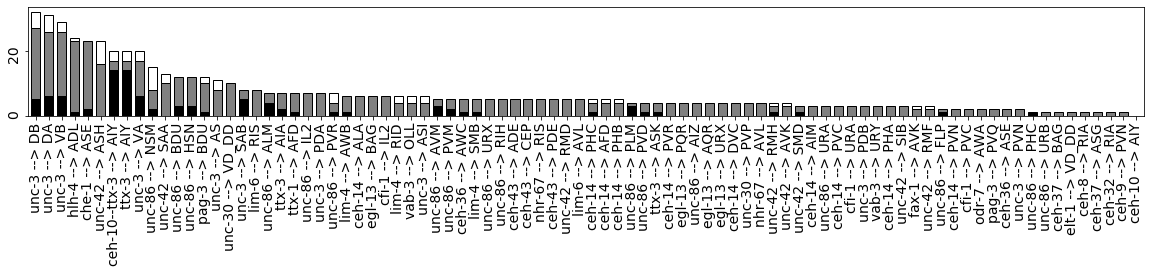

In [15]:
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('legend', fontsize=14)    # legend fontsize

m=m.sort_values(ascending=[False,False,False, True],by=['Hobert total markers tested','Hobert TF dep marker count','num of genes with bs mutated','Hobert TF independent marker count'])
ax=m[["neuron_class","TF",'num of genes with bs mutated','TF dep minus mutated','Hobert TF independent marker count']].plot.bar(legend=False,stacked=True,figsize=(20,2),color=['black','grey','white'],edgecolor='black',rot=90,width=.7)
xlabels=m[["neuron_class","TF"]].values
xlabels=['%s --> %s'.expandtabs() %(i[1],i[0]) for i in xlabels]
ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
#plt.ylabel("markers")
#plt.tight_layout()
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig5_TFdep_marker_bar2_%s.pdf' %data_source)

plt.show()

In [16]:
m.loc[m['neuron_class']=='PHA'].values

array([[19, 'ceh-14', 'PHA', 'eat-4', nan, nan, nan, nan, nan,
        'Serrano-Saiz et al 2013', 3, 0, 0.0, 3, 'no', nan, nan, 3.0,
        'M00435_2.00', 'B-I', 261, 162, 0.6206896551724138,
        0.3793103448275862]], dtype=object)

In [16]:
m.loc[m['neuron_class']=='SAA'][['TF','Hobert TF dep marker count','num of genes with bs mutated','marker_count', 'obs_motif','model','prop','fc']]

TF  Hobert TF dep marker count  num of genes with bs mutated  \
14  unc-42                          10                           0.0   

    marker_count  obs_motif model    prop        fc  
14            80         43   A-I  0.5375  1.778157

In [17]:
df.loc[(df['TF']=='unc-86') & (df['neuron_class']=='BDU')]

Unnamed: 0 model      TF     motif_ID neuron_class  marker_count  \
764         764   A-I  unc-86  M03312_2.00          BDU           259   
795         795   A-I  unc-86  M02244_2.00          BDU           259   

     obs_motif   exp_motif        fc       hg_pval       rs_pval  \
764        228  178.557131  1.276902  3.490000e-13  4.510000e-29   
795        141   74.629740  1.889327  3.530000e-18  2.090000e-09   

     best_subset_rs_pval  num_genes_in_subset      hg_pval*      rs_pval*  \
764         3.860000e-58                  147  1.540000e-12  1.200000e-27   
795         1.990000e-23                   75  2.990000e-17  6.960000e-09   

     best_subset_rs_pval*  
764          3.620000e-57  
795          3.790000e-23

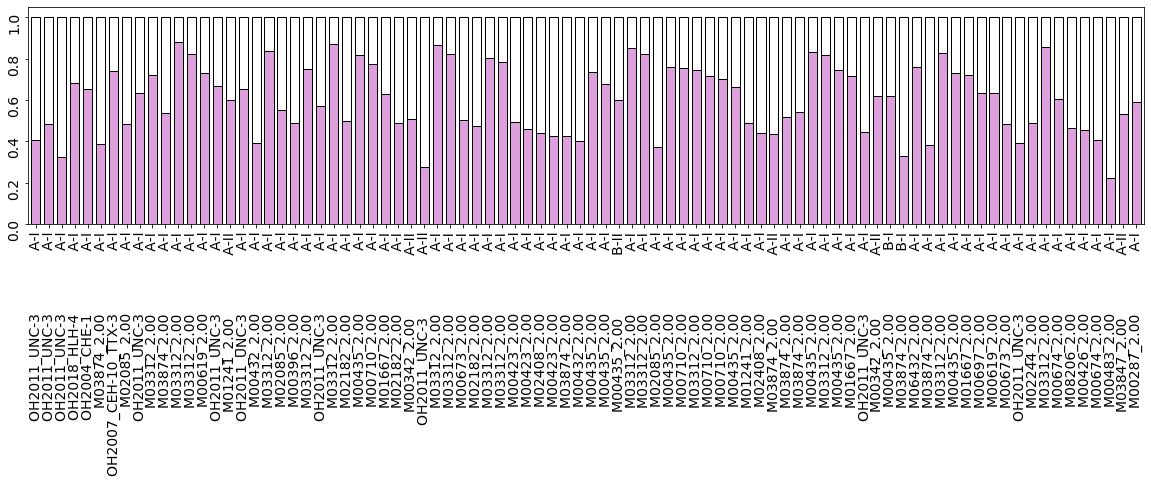

In [18]:

ax=m[["neuron_class","TF",'motif_ID','prop','1-prop']].plot.bar(stacked=True,figsize=(20,4),legend=False,color=['plum','white'],edgecolor='black',rot=90,width=.7)
xlabels=m[["motif_ID","model"]].values
xlabels=['%s\t\t%s'.expandtabs() %(i[0],i[1]) for i in xlabels]
ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
#plt.ylabel("proportion of neuron class markers with motifs")
ax.grid(False)
#plt.tight_layout()
plt.savefig('../../output/figure_parts/Fig5_gdata_prop_bar_%s.pdf' %data_source)

plt.show()

yellowgreen
86 86


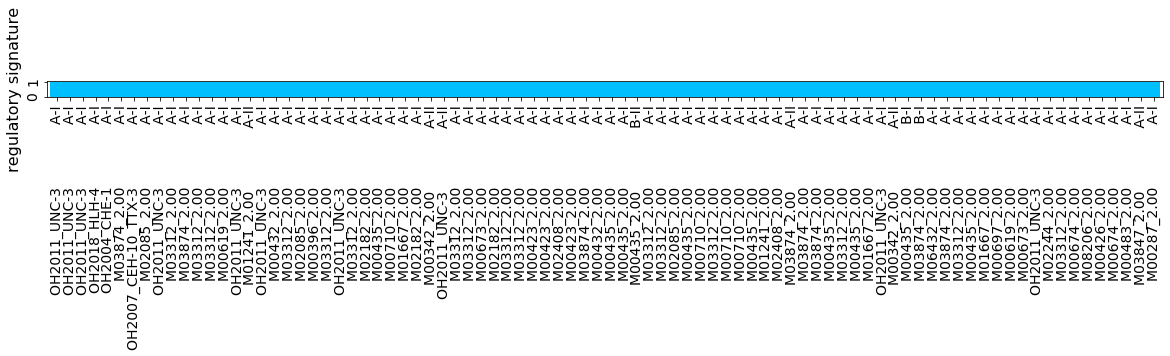

In [19]:
#Figure 4B.
#make a color bar to show model type.(or color motifs by color bar?)
m['1']=1
colorlist=[]
for i in m["model"].values:
    #print(i)
    if i=='A-I':
        colorlist.append('deepskyblue')
    elif i=='A-II':
         colorlist.append('lightblue')
    elif i=='B-I':
         colorlist.append('green')
    elif i=='B-II':
         colorlist.append('yellowgreen')
         print('yellowgreen')
    elif i=='C-I':
         colorlist.append('lightgrey')
    elif i=='C-II':
         colorlist.append('darkslategrey')
#print(colorlist)
print(len(m), len(colorlist))
ax=m[["1"]].plot.bar(stacked=True,figsize=(20,.3),legend=False,color=colorlist,edgecolor=None,rot=90,width=1)
xlabels=m[["motif_ID","model"]].values
xlabels=['%s\t\t%s'.expandtabs() %(i[0],i[1]) for i in xlabels]
ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("regulatory signature")
ax.grid(False)
#plt.tight_layout()
plt.savefig('../../output/figure_parts/Fig5_gdata_models_bar_%s.pdf' %data_source)

plt.show()

In [20]:
def piechart(labels,sizes,explode,leg_title,data_source,colorlist):
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels,autopct='', textprops=dict(color="w"),shadow=False, startangle=90, colors=colorlist)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    ax1.legend(wedges, labels,
          title=leg_title,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    #bbox_to_anchor=(1, 0, 0.5, 1)
    #plt.title(data_source)
    plt.tight_layout()
    plt.savefig('../../output/figure_parts/Fig5_pie_%s_%s.pdf' %(data_source,leg_title))
    plt.show()

Counter({'A-I': 77, 'A-II': 6, 'B-I': 2, 'B-II': 1})


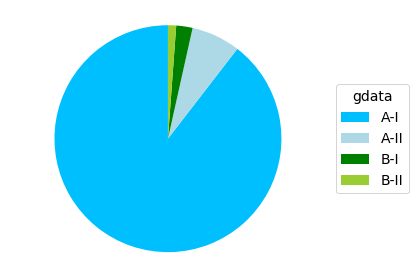

sc


In [21]:
#Fig 4B pie chart.

c=collections.Counter(list(m["model"].values))
print(c)
labels=sorted(list(m["model"].drop_duplicates().values))
sizes=[c['A-I'],c['A-II'],c['B-I'],c['B-II']]#,c['C-I'],c['C-II']]
explode=(0,0,0,0)#,0,0)
leg_title='gdata'
colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']
piechart(labels,sizes,explode,leg_title,data_source,colorlist)
print(data_source)
#plt.pie([v for v in c.values()], labels=[k for k in c.keys()])


In [22]:
def get_nc_count(mod):
    r=m.loc[m["model"]==mod]
    nc_count=len(r["neuron_class"].drop_duplicates())
    tf_count=len(r["TF"].drop_duplicates())
    return nc_count
def get_tf_count(mod):
    r=m.loc[m["model"]==mod]
    tf_count=len(r["TF"].drop_duplicates())
    return tf_count

total neuron class in genetic data: 67
total TFs in genetic data: 26


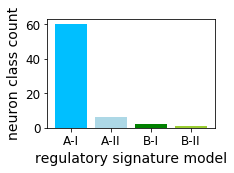

[60, 6, 2, 1]
60 out of  67
minus bonefide TS target neuron classes:  53  neuron classes out of  60


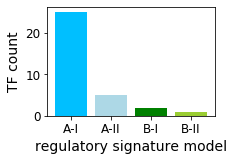

[25, 5, 2, 1]
24 TF out of  26
ceh-10--ttx-3 = substract 1. Subtract 4 bonefide TS TFs -unc-3, che-1, hlh-4, ttx-3
minus bonefide TS:  20 TF out of  22


In [23]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize
len_nc=len(m["neuron_class"].drop_duplicates())
len_tf=len(m["TF"].drop_duplicates())      

print('total neuron class in genetic data:',len_nc )
print('total TFs in genetic data:', len_tf-1)

models=['A-I','A-II','B-I','B-II']#,'C-I','C-II']
colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']

#nc count per model
sizes=[get_nc_count(mod) for mod in models] 
rcParams['figure.figsize'] = 3, 2
plt.bar(range(len(sizes)),sizes,color=colorlist)
ind = np.arange(len(sizes))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("neuron class count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig5_barplot_nc_count_models.pdf')
plt.show()
print(sizes)
print(sizes[0], 'out of ',len_nc )

#change number of bonefide TS neuron classes to 7 for single cell data if VA is sequenced.
bonefide_TS_nc=len(['DA','DB','VA','VB','ASE','ADL','AIY'])
print('minus bonefide TS target neuron classes: ',sizes[0]-bonefide_TS_nc, ' neuron classes out of ',len_nc-bonefide_TS_nc )


#tf count per model
sizes=[get_tf_count(mod) for mod in models] 
#from pylab import rcParams
#subtract one TF for ceh-10--ttx-3 ()
#sizes=[sizes[0]-1]+sizes[1:]
rcParams['figure.figsize'] = 3, 2


plt.bar(range(len(sizes)),sizes,color=colorlist)
ind = np.arange(len(sizes))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("TF count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig5_barplot_tf_count_models.pdf')
plt.show()
print(sizes)
print(sizes[0]-1, 'TF out of ',len_tf-1 )
print('ceh-10--ttx-3 = substract 1. Subtract 4 bonefide TS TFs -unc-3, che-1, hlh-4, ttx-3')
print('minus bonefide TS: ', sizes[0]-5, 'TF out of ',len_tf-5 )

In [24]:
print(sizes)
print(int(sizes[0])-1, 'TF out of ',len_tf-1 )

[25, 5, 2, 1]
24 TF out of  26


27


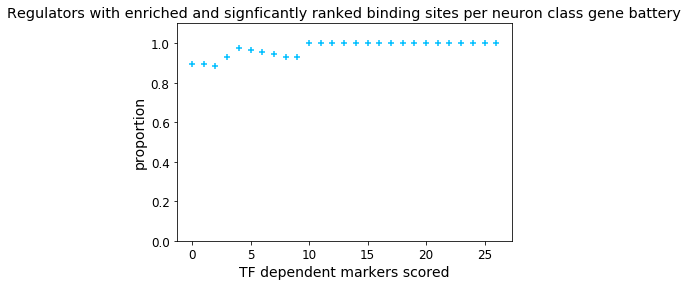

In [25]:
#scatter plot
#m[['Hobert TF dep marker count','model']]
rcParams['figure.figsize'] = 6, 4

max_c=max(m['Hobert TF dep marker count'].values)
print(max_c)
props=[]
for i in range(max_c):
    models=list(m.loc[m["Hobert TF dep marker count"]>i]["model"].values)
    x=models.count('A-I')
    y=float(len(models))
    #print(i,x/y)
    #props.append('%.1f' %(x/y))
    props.append(x/y)
plt.scatter(list(range(max_c)),props,marker='+',color='deepskyblue')
plt.ylim(0,1.1)
plt.xlabel("TF dependent markers scored")
plt.ylabel("proportion")
plt.title("Regulators with enriched and signficantly ranked binding sites per neuron class gene battery")
plt.savefig('../../output/figure_parts/SuppFig2_scatter_prop_A_1_by_TFdep_marker_count_%s.pdf' %(data_source))
plt.show()

/Users/lori/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


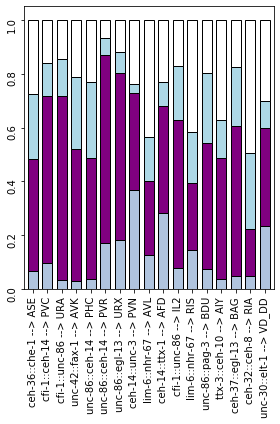

17


In [8]:
m=gdata.merge(df[["neuron_class","TF","motif_ID","model",'marker_count', 'obs_motif']], on=["neuron_class","TF"])
m['prop']=m['obs_motif']/m['marker_count']
m['1-prop']=1-m['prop']

from matplotlib import rcParams


rcParams.update({'figure.autolayout': True})
#add cofactor results from gdata?
df_cf=df_cf.sort_values(ascending=True,by='comb_model')
cols=['neuron_class','TFA','TFB','motifA_ID','motifB_ID','comb_model','marker_countAB']
AB_df=pd.DataFrame()
for nc in m["neuron_class"].drop_duplicates().values:
    TFs=m.loc[m['neuron_class']==nc]['TF'].drop_duplicates().values
    if len(set(TFs))>1:
        if nc=='AIY':
            TFs=['ttx-3','ceh-10']
        r=df_cf.loc[(df_cf["neuron_class"]==nc)& (df_cf["TFA"].isin(TFs)) & (df_cf["TFB"].isin(TFs)) & (df_cf["TFB"]!=df_cf["TFA"])]
        x=r[cols].values[0]
        mA=x[3]
        mB=x[4]
        tfA=x[1]
        tfB=x[2]
        comb_mod=x[5]
        #get marker counts for TFA and TFB
        A=df.loc[(df['motif_ID']==mA) & (df["neuron_class"]==nc)]
        cA=A['obs_motif'].values[0]
        marker_count=A['marker_count'].values[0]
       
        B=df.loc[(df['motif_ID']==mB) & (df["neuron_class"]==nc)]
        cB=B['obs_motif'].values[0]

        cAB=x[6]
  
        A_only=cA-cAB
        B_only=cB-cAB
        neither=marker_count-A_only-B_only-cAB
        headers=['neuron_class','TFA','TFB','comb_model','A_only','AB','B_only','neither']

        results=[nc,tfA,tfB, comb_mod, A_only/marker_count, cAB/marker_count, B_only/marker_count,neither/marker_count]
        dictionary = dict(zip(headers, results))
        AB_df=AB_df.append(dictionary,ignore_index=True)       
AB_df=AB_df[headers].sort_values(ascending=True,by='comb_model')   

#bar plot
ax=AB_df.plot.bar(stacked=True,figsize=(4,6),colors=['lightsteelblue','purple','lightblue','white'],edgecolor='black',legend=False,width=.7)
xlabels=AB_df[["neuron_class","TFA","TFB"]].values
#xlabels=['%s\t%s::%s'.expandtabs() %(i[0],i[1],i[2]) for i in xlabels]
xlabels=['%s::%s --> %s'.expandtabs() %(i[1],i[2],i[0]) for i in xlabels]

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
#plt.ylabel("proportion of neuron class markers with motifs")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig9A_gdataAB_props_bar_%s.pdf' %data_source)
plt.show()
rcParams.update({'figure.autolayout': False})
print(len(AB_df))

In [10]:
TFA=list(AB_df["TFA"].values)
TFB=list(AB_df["TFB"].values)
len(set(TFA+TFB))

20

In [11]:
len(set(list(AB_df["neuron_class"].values)))

17

In [12]:
print('number of co-factor pairs with genetic loss of function data:', len(AB_df))

number of co-factor pairs with genetic loss of function data: 17


In [13]:
AB_df

neuron_class     TFA     TFB    comb_model    A_only        AB    B_only  \
0           ASE  ceh-36   che-1   A-I,A-I,A-I  0.068452  0.413690  0.241071   
14          PVC   cfi-1  ceh-14   A-I,A-I,A-I  0.096019  0.622951  0.119438   
13          URA   cfi-1  unc-86   A-I,A-I,A-I  0.035294  0.682353  0.135294   
12          AVK  unc-42   fax-1   A-I,A-I,A-I  0.028846  0.490385  0.269231   
11          PHC  unc-86  ceh-14   A-I,A-I,A-I  0.036697  0.449541  0.284404   
10          PVR  unc-86  ceh-14   A-I,A-I,A-I  0.170455  0.700758  0.060606   
9           URX  unc-86  egl-13   A-I,A-I,A-I  0.181303  0.623229  0.076487   
15          PVN  ceh-14   unc-3   A-I,A-I,A-I  0.368852  0.360656  0.032787   
8           AVL   lim-6  nhr-67   A-I,A-I,A-I  0.127907  0.273256  0.165698   
6           AFD  ceh-14   ttx-1   A-I,A-I,A-I  0.283784  0.394595  0.091892   
5           IL2   cfi-1  unc-86   A-I,A-I,A-I  0.080272  0.548299  0.198639   
4           RIS   lim-6  nhr-67   A-I,A-I,A-I  0.144509  0.248555  0.190751   
2           BDU  unc-86   pag-3   A-I,A-I,A-I  0.073359  0.471042  0.258687   
1           AIY   ttx-3  ceh-10   A-I,A-I,A-I  0.039548  0.446328  0.141243   
7           BAG  ceh-37  egl-13   A-I,A-I,A-I  0.049430  0.555133  0.220532   
16          RIA  ceh-32   ceh-8   A-I,A-I,A-I  0.050000  0.172727  0.284091   
3         VD_DD  unc-30   elt-1  A-I,A-II,A-I  0.235294  0.364706  0.100000   

     neither  
0   0.276786  
14  0.161593  
13  0.147059  
12  0.211538  
11  0.229358  
10  0.068182  
9   0.118980  
15  0.237705  
8   0.433140  
6   0.229730  
5   0.172789  
4   0.416185  
2   0.196911  
1   0.372881  
7   0.174905  
16  0.493182  
3   0.300000

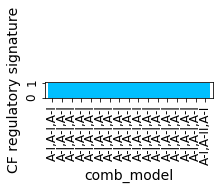

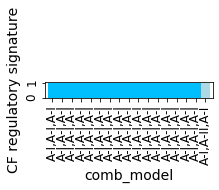

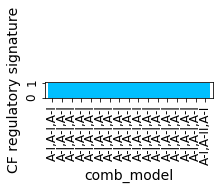

In [32]:
#get models for cofactor genetic evidence
AB_df['1']=1

def plot_colors(AB_df, k):
    colorlist=[]
    #k=0
    for i in AB_df["comb_model"]:
        s=i.split(',')
        if s[k]=='A-I':
            colorlist.append('deepskyblue')
        elif s[k]=='A-II':
             colorlist.append('lightblue')
        elif s[k]=='B-I':
             colorlist.append('green')
        elif s[k]=='B-II':
             colorlist.append('yellowgreen')
        elif s[k]=='C-I':
             colorlist.append('lightgrey')
        elif s[k]=='C-II':
             colorlist.append('darkslategrey')
    #print(colorlist)
    #ax=AB_df[["1"]].plot.bar(stacked=True,figsize=(3,.3),legend=False,color=colorlist,edgecolor=None,rot=90,width=1)
    ax=AB_df.plot.bar(x="comb_model", y="1", rot=90, color = colorlist,width=1,figsize=(3,.3),legend=False,edgecolor=None)

    xlabels=AB_df[["comb_model"]].values
    xlabels=['%s' %(i[0]) for i in xlabels]
    ax.set_xticklabels(xlabels, rotation=90)
    plt.yticks(rotation=90)
    plt.ylabel("CF regulatory signature")
    ax.grid(False)
    #plt.tight_layout()
    plt.savefig('../../output/figure_parts/Fig9%s_gdataAB_colorbarCF_%s.pdf' %(k,data_source))
AB_df['1']=1

k=0
plot_colors(AB_df,0)
plot_colors(AB_df,1)
plot_colors(AB_df,2)

#plt.show()